In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import altair as alt
import pandas as pd

In [2]:
ds = pd.read_csv('S1SubActivities_temporalFeaturesNoDUPES.csv', index_col = None) 
ds.start = pd.to_datetime(ds.start, format='%Y-%m-%d %H:%M:%S')
ds.end = pd.to_datetime(ds.end, format='%Y-%m-%d %H:%M:%S')

In [3]:
ds.head()

,subActNum,subAct,start,end,dayNumeric,DAY,WDWE,HOUR,durationSec
0,67,bathroom_cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,3,Thu,WD,6,3
1,100,bathroom_toiletflush,2003-03-27 06:44:06,2003-03-27 07:12:41,3,Thu,WD,6,1715
2,101,bathroom_lightswitch,2003-03-27 06:44:20,2003-03-27 07:46:34,3,Thu,WD,6,3734
3,57,bathroom_medicinecabinet,2003-03-27 06:44:35,2003-03-27 06:44:48,3,Thu,WD,6,13
4,57,bathroom_medicinecabinet,2003-03-27 06:44:36,2003-03-27 06:44:48,3,Thu,WD,6,12


In [4]:
# def add_DAY_WDWE_phaseI(ds):
#     dayNumKeyWithDAYDict = pd.Series(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ['0','1','2','3','4','5','6']).to_dict()
#     dayNumKeyWithWDWEDict = pd.Series(['WD','WD','WD','WD','WD','WE','WE'], ['0','1','2','3','4','5','6']).to_dict()
#     ds.set_index(ds.start, inplace = True)
#     ds.insert((len(ds.columns)), "dayNumeric", ds.index.dayofweek.astype(str), True)
#     ds.insert((len(ds.columns)), "DAY", ds.index.dayofweek.astype(str), True)
#     ds.insert((len(ds.columns)), "WDWE", ds.index.dayofweek.astype(str), True)
#     ds = ds.replace({"DAY": dayNumKeyWithDAYDict})
#     ds = ds.replace({"WDWE": dayNumKeyWithWDWEDict})
#     ds.reset_index(drop = True, inplace = True)
#     ds['HOUR'] = ds['start'].dt.hour
#     ds['durationSec'] = ds['end'] - ds['start']
#     ds['durationSec'] = ds['durationSec'].dt.total_seconds()
#     ds['durationSec'] = ds.durationSec.astype(int)
#     return ds

In [5]:
# ds = add_DAY_WDWE_phaseI(ds)
# ds.head()

In [4]:
# Unique subActNum list
unique_list = []
for x in ds.subActNum:                  # Traverse for all elements 
    if x not in unique_list:            # Check if exists in unique_list or not 
        unique_list.append(x)     

In [5]:
# Should this be done earlier?
ds = ds[ds.subAct != 'bedroom_jewelrybox']
ds = ds[ds.subAct != 'foyer_closet']
ds = ds[ds.subAct != 'kitchen_cereal']
ds = ds[ds.subAct != 'kitchen_containers']
ds = ds[ds.subAct != 'bedroom_lamp']

In [6]:
ds.head(n=5)

,subActNum,subAct,start,end,dayNumeric,DAY,WDWE,HOUR,durationSec
0,67,bathroom_cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,3,Thu,WD,6,3
1,100,bathroom_toiletflush,2003-03-27 06:44:06,2003-03-27 07:12:41,3,Thu,WD,6,1715
2,101,bathroom_lightswitch,2003-03-27 06:44:20,2003-03-27 07:46:34,3,Thu,WD,6,3734
3,57,bathroom_medicinecabinet,2003-03-27 06:44:35,2003-03-27 06:44:48,3,Thu,WD,6,13
4,57,bathroom_medicinecabinet,2003-03-27 06:44:36,2003-03-27 06:44:48,3,Thu,WD,6,12


In [7]:
ds['durationSec'] = np.where(ds['subActNum'] == 100, 1, ds['durationSec'])

In [8]:
from datetime import datetime, timedelta
ds['end'] = np.where(ds['subActNum'] == 100, 
                     ds['start'] + timedelta(seconds=1), ds['end'])

In [9]:
dsCheck = ds[ds.subActNum == 100]
dsCheck.head()

,subActNum,subAct,start,end,dayNumeric,DAY,WDWE,HOUR,durationSec
1,100,bathroom_toiletflush,2003-03-27 06:44:06,2003-03-27 06:44:07,3,Thu,WD,6,1
17,100,bathroom_toiletflush,2003-03-27 07:34:47,2003-03-27 07:34:48,3,Thu,WD,7,1
77,100,bathroom_toiletflush,2003-03-27 17:43:13,2003-03-27 17:43:14,3,Thu,WD,17,1
98,100,bathroom_toiletflush,2003-03-28 12:31:01,2003-03-28 12:31:02,4,Fri,WD,12,1
99,100,bathroom_toiletflush,2003-03-28 12:31:01,2003-03-28 12:31:02,4,Fri,WD,12,1


In [10]:
subActNames = ['bathroom_cabinet', 'bathroom_medicinecabinet', 'study_drawer', 
                'bedroom_drawer', 'kitchen_cabinet', 'kitchen_microwave', 
                'kitchen_door', 'bathroom_showerfaucet', 'kitchen_drawer', 
                'bathroom_sinkfaucet-hot', 'kitchen_freezer', 'bathroom_door',
                'kitchen_toaster', 'kitchen_lightswitch', 'study_lightwitch', 
                'kitchen_dishwasher', 'livingroom_lightswitch']

In [11]:
ds.head()

,subActNum,subAct,start,end,dayNumeric,DAY,WDWE,HOUR,durationSec
0,67,bathroom_cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,3,Thu,WD,6,3
1,100,bathroom_toiletflush,2003-03-27 06:44:06,2003-03-27 06:44:07,3,Thu,WD,6,1
2,101,bathroom_lightswitch,2003-03-27 06:44:20,2003-03-27 07:46:34,3,Thu,WD,6,3734
3,57,bathroom_medicinecabinet,2003-03-27 06:44:35,2003-03-27 06:44:48,3,Thu,WD,6,13
4,57,bathroom_medicinecabinet,2003-03-27 06:44:36,2003-03-27 06:44:48,3,Thu,WD,6,12


In [12]:
subActRows = []

for subActName in subActNames:
    dsNew = ds[ds.subAct == subActName]
    dsNew = ds[ds.subAct == subActName]
    count = dsNew.durationSec.count()
    median = dsNew.durationSec.median()
    mean = dsNew.durationSec.mean() 
    std = dsNew.durationSec.std()
    #outliers = detect_outlier(dsNew['durationSec'])
    
    column = {'SubAct': subActName,'Count': count,'Median': median, 'Mean': mean, 'Std': std}
    subActRows.append(column)

allMedianValues = pd.DataFrame(subActRows, index=None, 
                            columns=['SubAct', 'Count', 'Median', 'Mean', "Std"])

In [13]:
allMedianValues

,SubAct,Count,Median,Mean,Std
0,bathroom_cabinet,104,3.0,459.221154,3176.163323
1,bathroom_medicinecabinet,194,87.0,3187.974227,7354.142408
2,study_drawer,45,5.0,1633.488889,5432.406346
3,bedroom_drawer,99,9.0,272.474747,1918.726179
4,kitchen_cabinet,406,6.0,111.820197,1864.012246
5,kitchen_microwave,61,5.0,376.409836,2868.667916
6,kitchen_door,134,3.0,45.111940,174.185652
7,bathroom_showerfaucet,88,14.0,1753.352273,6540.729518
8,kitchen_drawer,208,3.0,144.062500,1727.576706
9,bathroom_sinkfaucet-hot,169,10.0,56.905325,501.272871


In [14]:
for row in allMedianValues.iterrows():
#     print("Processing", row[1].SubAct)
#     print(ds[(ds['subAct'] == row[1].SubAct) & (ds['durationSec'] > row[1].Median + 0.5 * row[1].Std)].count())
    ds.loc[(ds['subAct'] == row[1].SubAct) &
           (ds['durationSec'] > row[1].Median + 0.5 * row[1].Std),
           'durationSec'] = round(row[1].Median)

In [15]:
ds.head()

,subActNum,subAct,start,end,dayNumeric,DAY,WDWE,HOUR,durationSec
0,67,bathroom_cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,3,Thu,WD,6,3
1,100,bathroom_toiletflush,2003-03-27 06:44:06,2003-03-27 06:44:07,3,Thu,WD,6,1
2,101,bathroom_lightswitch,2003-03-27 06:44:20,2003-03-27 07:46:34,3,Thu,WD,6,3734
3,57,bathroom_medicinecabinet,2003-03-27 06:44:35,2003-03-27 06:44:48,3,Thu,WD,6,13
4,57,bathroom_medicinecabinet,2003-03-27 06:44:36,2003-03-27 06:44:48,3,Thu,WD,6,12


In [16]:
from datetime import datetime, timedelta
ds.end = ds.apply(lambda x: x.start + timedelta(seconds=x.durationSec), axis=1)

In [17]:
ds.head()

,subActNum,subAct,start,end,dayNumeric,DAY,WDWE,HOUR,durationSec
0,67,bathroom_cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,3,Thu,WD,6,3
1,100,bathroom_toiletflush,2003-03-27 06:44:06,2003-03-27 06:44:07,3,Thu,WD,6,1
2,101,bathroom_lightswitch,2003-03-27 06:44:20,2003-03-27 07:46:34,3,Thu,WD,6,3734
3,57,bathroom_medicinecabinet,2003-03-27 06:44:35,2003-03-27 06:44:48,3,Thu,WD,6,13
4,57,bathroom_medicinecabinet,2003-03-27 06:44:36,2003-03-27 06:44:48,3,Thu,WD,6,12


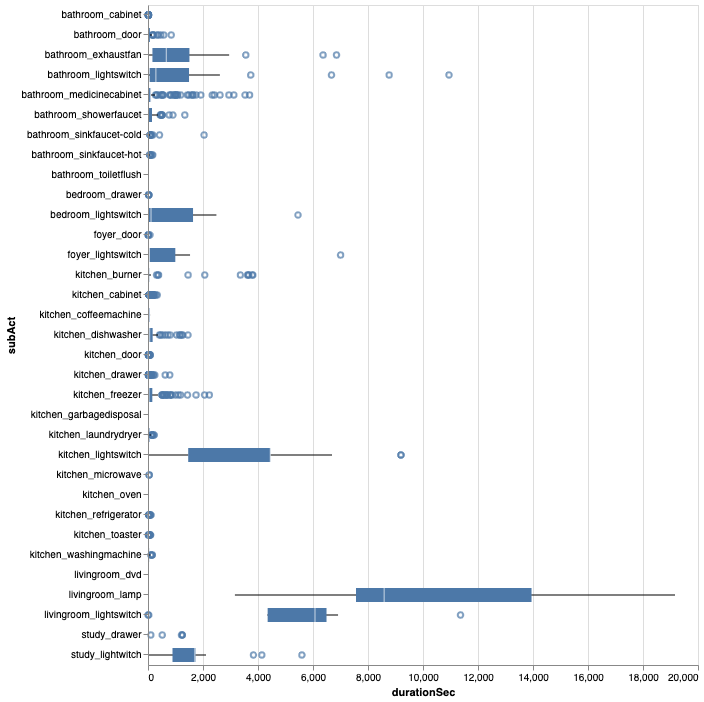

In [18]:
alt.Chart(ds).mark_boxplot().encode(
    x = 'durationSec',
    y = 'subAct',
).properties(width = 550).interactive()

In [19]:
ds.head()

,subActNum,subAct,start,end,dayNumeric,DAY,WDWE,HOUR,durationSec
0,67,bathroom_cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,3,Thu,WD,6,3
1,100,bathroom_toiletflush,2003-03-27 06:44:06,2003-03-27 06:44:07,3,Thu,WD,6,1
2,101,bathroom_lightswitch,2003-03-27 06:44:20,2003-03-27 07:46:34,3,Thu,WD,6,3734
3,57,bathroom_medicinecabinet,2003-03-27 06:44:35,2003-03-27 06:44:48,3,Thu,WD,6,13
4,57,bathroom_medicinecabinet,2003-03-27 06:44:36,2003-03-27 06:44:48,3,Thu,WD,6,12


In [19]:
ds_new = ds.copy()

In [20]:
ds_new['Phase'] = "Afternoon"
ds_new.loc[ds_new['HOUR'] < 9, 'Phase'] = "Morning"
ds_new.loc[ds_new['HOUR'] >= 17, 'Phase'] = "Evening"

In [21]:
benchmark_usage = ds_new.groupby(['subAct','WDWE','Phase'])['durationSec'].mean()

In [22]:
benchmark_usage

subAct            WDWE  Phase    
bathroom_cabinet  WD    Afternoon       6.862069
                        Evening         2.833333
                        Morning         4.800000
                  WE    Afternoon       4.181818
                        Evening         2.272727
                                        ...     
study_lightwitch  WD    Afternoon    1853.875000
                        Evening      1427.285714
                        Morning      1184.800000
                  WE    Afternoon    1157.666667
                        Evening      2532.000000
Name: durationSec, Length: 164, dtype: float64

In [23]:
benchmark_usage['bathroom_lightswitch']['WD']['Afternoon']

1726.4

In [ ]:
# Load in the boolean data
# For each row
#     Classify 

In [24]:
df = pd.read_csv('S1Act_B_m_NoDupes.csv', index_col = "duration")

In [25]:
df.head()

,bathroom_cabinet,bathroom_door,bathroom_exhaustfan,bathroom_lightswitch,bathroom_medicinecabinet,bathroom_showerfaucet,bathroom_sinkfaucet-cold,bathroom_sinkfaucet-hot,bathroom_toiletflush,bedroom_drawer,...,kitchen_microwave,kitchen_oven,kitchen_refrigerator,kitchen_toaster,kitchen_washingmachine,livingroom_dvd,livingroom_lamp,livingroom_lightswitch,office/study_drawer,office/study_lightswitch
duration,,,,,,,,,,,,,,,,,,,,,
2003-03-27 06:43:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-03-27 06:44:00,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-03-27 06:45:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2003-03-27 06:46:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-03-27 06:47:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
import sklearn

In [27]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection as fs
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [28]:
df.reset_index(drop = True, inplace = True)

In [29]:
Data = df.drop(columns = 'bathroom_lightswitch').values   #
target = df['bathroom_lightswitch']                       #

In [30]:
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999)

In [31]:
dt_classifier = DecisionTreeClassifier(max_depth=4,
                                       criterion='entropy',
                                       random_state = 999)

In [32]:
dt_classifier.fit(D_train, t_train);

In [33]:
dt_classifier.score(D_test, t_test)

0.9378151260504202

In [34]:
df['prediction'] = dt_classifier.predict(Data)

In [36]:
df['prediction']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13877    0.0
13878    0.0
13879    0.0
13880    0.0
13881    0.0
Name: prediction, Length: 13882, dtype: float64

In [35]:
df['intervention'] = (df['prediction'].diff() == -1) & (df['bathroom_lightswitch'] == 1)

In [37]:
df['intervention']

0        False
1        False
2        False
3        False
4        False
         ...  
13877    False
13878    False
13879    False
13880    False
13881    False
Name: intervention, Length: 13882, dtype: bool

In [38]:
simulated_col = []
intervening = False
for row in df.iterrows():
    simulated = row[1]['bathroom_lightswitch']
    if row[1]['intervention']:
        intervening = True
    if intervening:
        simulated = 0
        if row[1]['bathroom_lightswitch'] == 0:
            intervening = False
    simulated_col.append(simulated)
df['simulated'] = simulated_col

In [39]:
df['simulated'].sum()

828.0

In [40]:
df['bathroom_lightswitch'].sum()

1067.0

In [41]:
df['bathroom_lightswitch'].sum() - df['simulated'].sum() * dt_classifier.score(D_test, t_test)

290.48907563025205

In [42]:
dfIDX = pd.read_csv('S1Act_B_m_NoDupes.csv', index_col = None)
dfIDX.duration = pd.to_datetime(dfIDX.duration, format='%Y-%m-%d %H:%M:%S')
dfIDX.head()

,duration,bathroom_cabinet,bathroom_door,bathroom_exhaustfan,bathroom_lightswitch,bathroom_medicinecabinet,bathroom_showerfaucet,bathroom_sinkfaucet-cold,bathroom_sinkfaucet-hot,bathroom_toiletflush,...,kitchen_microwave,kitchen_oven,kitchen_refrigerator,kitchen_toaster,kitchen_washingmachine,livingroom_dvd,livingroom_lamp,livingroom_lightswitch,office/study_drawer,office/study_lightswitch
0,2003-03-27 06:43:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-03-27 06:44:00,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003-03-27 06:45:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2003-03-27 06:46:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003-03-27 06:47:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
dfIDX['duration']

0       2003-03-27 06:43:00
1       2003-03-27 06:44:00
2       2003-03-27 06:45:00
3       2003-03-27 06:46:00
4       2003-03-27 06:47:00
                ...        
13877   2003-04-11 22:20:00
13878   2003-04-11 22:21:00
13879   2003-04-11 22:22:00
13880   2003-04-11 22:23:00
13881   2003-04-11 22:24:00
Name: duration, Length: 13882, dtype: datetime64[ns]

In [44]:
df.head()

,bathroom_cabinet,bathroom_door,bathroom_exhaustfan,bathroom_lightswitch,bathroom_medicinecabinet,bathroom_showerfaucet,bathroom_sinkfaucet-cold,bathroom_sinkfaucet-hot,bathroom_toiletflush,bedroom_drawer,...,kitchen_toaster,kitchen_washingmachine,livingroom_dvd,livingroom_lamp,livingroom_lightswitch,office/study_drawer,office/study_lightswitch,prediction,intervention,simulated
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1.0


In [45]:
df['timestamp'] = dfIDX['duration']

In [46]:
import datetime as dt
def add_DAY_WDWE_phaseII(ds):
    dayNumKeyWithDAYDict = pd.Series(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ['0','1','2','3','4','5','6']).to_dict()
    dayNumKeyWithWDWEDict = pd.Series(['WD','WD','WD','WD','WD','WE','WE'], ['0','1','2','3','4','5','6']).to_dict()
    ds.set_index(ds['timestamp'], inplace = True)
    ds.insert((len(ds.columns)), "DAY", ds.index.dayofweek.astype(str), True)
    ds.insert((len(ds.columns)), "WDWE", ds.index.dayofweek.astype(str), True)
    ds = ds.replace({"DAY": dayNumKeyWithDAYDict})
    ds = ds.replace({"WDWE": dayNumKeyWithWDWEDict})
    ds.reset_index(drop = True, inplace = True)
    ds['Hour'] = ds['timestamp'].dt.hour
    return ds

df = add_DAY_WDWE_phaseII(df)
df.head()

,bathroom_cabinet,bathroom_door,bathroom_exhaustfan,bathroom_lightswitch,bathroom_medicinecabinet,bathroom_showerfaucet,bathroom_sinkfaucet-cold,bathroom_sinkfaucet-hot,bathroom_toiletflush,bedroom_drawer,...,livingroom_lightswitch,office/study_drawer,office/study_lightswitch,prediction,intervention,simulated,timestamp,DAY,WDWE,Hour
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,2003-03-27 06:43:00,Thu,WD,6
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,False,1.0,2003-03-27 06:44:00,Thu,WD,6
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,False,1.0,2003-03-27 06:45:00,Thu,WD,6
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,False,1.0,2003-03-27 06:46:00,Thu,WD,6
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,False,1.0,2003-03-27 06:47:00,Thu,WD,6


In [47]:
df['Phase'] = "Afternoon"
df.loc[df['Hour'] < 9, 'Phase'] = "Morning"
df.loc[df['Hour'] >= 17, 'Phase'] = "Evening"
df.head()

,bathroom_cabinet,bathroom_door,bathroom_exhaustfan,bathroom_lightswitch,bathroom_medicinecabinet,bathroom_showerfaucet,bathroom_sinkfaucet-cold,bathroom_sinkfaucet-hot,bathroom_toiletflush,bedroom_drawer,...,office/study_drawer,office/study_lightswitch,prediction,intervention,simulated,timestamp,DAY,WDWE,Hour,Phase
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,False,0.0,2003-03-27 06:43:00,Thu,WD,6,Morning
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,False,1.0,2003-03-27 06:44:00,Thu,WD,6,Morning
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,False,1.0,2003-03-27 06:45:00,Thu,WD,6,Morning
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,False,1.0,2003-03-27 06:46:00,Thu,WD,6,Morning
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,False,1.0,2003-03-27 06:47:00,Thu,WD,6,Morning


In [48]:
# Calculate approx durations
duration = 0
duration_col = []

for row in df.iterrows():
    if row[1]['bathroom_lightswitch'] == 1:
        duration += 1
    else:
        duration = 0
    
    duration_col.append(duration)

df['duration'] = duration_col

In [49]:
df.head()

,bathroom_cabinet,bathroom_door,bathroom_exhaustfan,bathroom_lightswitch,bathroom_medicinecabinet,bathroom_showerfaucet,bathroom_sinkfaucet-cold,bathroom_sinkfaucet-hot,bathroom_toiletflush,bedroom_drawer,...,office/study_lightswitch,prediction,intervention,simulated,timestamp,DAY,WDWE,Hour,Phase,duration
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,0.0,2003-03-27 06:43:00,Thu,WD,6,Morning,0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,False,1.0,2003-03-27 06:44:00,Thu,WD,6,Morning,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,False,1.0,2003-03-27 06:45:00,Thu,WD,6,Morning,2
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,False,1.0,2003-03-27 06:46:00,Thu,WD,6,Morning,3
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,False,1.0,2003-03-27 06:47:00,Thu,WD,6,Morning,4


In [50]:
complex_simulated_col = []
cancelled_interventions = 0
interventions = 0
possible_intervention = False
intervening = False
temp_electricity_saved = 0
total_electricity_saved = 0

for row in df.iterrows():
    simulated = row[1]['bathroom_lightswitch']
    if row[1]['intervention'] and not intervening:
        possible_intervention = True
        print(row[0], 'Possible Intervention')
    if possible_intervention:
        if row[1]['bathroom_lightswitch'] == 0:
            possible_intervention = False
            print(row[0], 'Possible Intervention Cancelled')
            cancelled_interventions += 1
        else:
            if row[1]['duration'] > benchmark_usage['bathroom_lightswitch'][row[1]['WDWE']][row[1]['Phase']] / 60:
                print("Intervention - Light Turned Off")
                intervening = True
                interventions += 1
                possible_intervention = False
    if intervening:
        if row[1]['bathroom_lightswitch'] == 0:
            intervening = False
            print("Intervention complete, saved ", temp_electricity_saved)
            temp_electricity_saved = 0
        else:
            simulated = 0
            temp_electricity_saved += 1
            total_electricity_saved += 1
            
    complex_simulated_col.append(simulated)
df['complex_simulated'] = complex_simulated_col

1183 Possible Intervention
Intervention - Light Turned Off
Intervention complete, saved  56
2741 Possible Intervention
Intervention - Light Turned Off
Intervention complete, saved  1
4755 Possible Intervention
Intervention - Light Turned Off
Intervention complete, saved  13
7491 Possible Intervention
Intervention - Light Turned Off
Intervention complete, saved  2
7986 Possible Intervention
7988 Possible Intervention Cancelled
8137 Possible Intervention
Intervention - Light Turned Off
Intervention complete, saved  1
8165 Possible Intervention
8167 Possible Intervention Cancelled
9297 Possible Intervention
9298 Possible Intervention Cancelled
9432 Possible Intervention
9434 Possible Intervention Cancelled
9656 Possible Intervention
Intervention - Light Turned Off
Intervention complete, saved  8
10430 Possible Intervention
Intervention - Light Turned Off
Intervention complete, saved  2
10460 Possible Intervention
10465 Possible Intervention
10468 Possible Intervention
Intervention - Light

In [51]:
df['bathroom_lightswitch'].sum()

1067.0

In [52]:
df['complex_simulated'].sum()

869.0

In [53]:
df['simulated'].sum()

828.0

In [54]:
# We see that we didn't quite save as many minutes of electricity but we likely annoyed the user less
print("Number of completed interventions", interventions)
print("Number of interventions cancelled due to not meeting average number of minutes usage", cancelled_interventions)
print("Total electricity saved", total_electricity_saved)

Number of completed interventions 11
Number of interventions cancelled due to not meeting average number of minutes usage 4
Total electricity saved 198


In [21]:
weekDayMedianValues

NameError: name 'weekDayMedianValues' is not defined

In [22]:
s = weekDayMedianValues.apply(lambda x: pd.Series(x['Outliers']), 
                              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'durationValues'
weekDayValues = weekDayMedianValues.drop('Outliers', axis=1).join(s)

NameError: name 'weekDayMedianValues' is not defined

In [ ]:
weekDayValues['WDWE'] = 'WD'
weekDayValues['durationValues'] = weekDayValues.durationValues.astype(int)
weekDayValues['Median'] = weekDayValues.Median.astype(int)

In [ ]:
weekDayValues

In [ ]:
subActRows = []
for subActName in subActNames:
    dsNew = ds[ds.subAct == subActName]
    dsNew = dsNew[dsNew.WDWE == 'WE']
    count = dsNew.durationSec.count()
    median = dsNew.durationSec.median() 
    outliers = detect_outlier(dsNew['durationSec'])
    
    column = {'SubAct': subActName,'Count': count,'Median': median, 'Outliers': outliers}
    subActRows.append(column)

weekendMedianValues = pd.DataFrame(subActRows, index=None, 
                            columns=['SubAct', 'Count', 'Median', 'Outliers'])

In [ ]:
s = weekendMedianValues.apply(lambda x: pd.Series(x['Outliers']), 
                              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'durationValues'
weekendValues = weekendMedianValues.drop('Outliers', axis=1).join(s)

In [ ]:
weekendValues['WDWE'] = 'WE'
weekendValues['durationValues'] = weekendValues.durationValues.astype(int)
weekendValues['Median'] = weekendValues.Median.astype(int)

In [ ]:
weekendValues

In [ ]:
ds.head(n=5)

In [ ]:
weekendValues.head(n=5)